In [69]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Dataset

In [70]:
dataset = pd.read_csv("data/credit_data.csv")

dataset.shape

(2000, 5)

In [71]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [72]:
dataset.dropna(inplace=True)

dataset.shape

(1997, 5)

<Axes: xlabel='c#default', ylabel='count'>

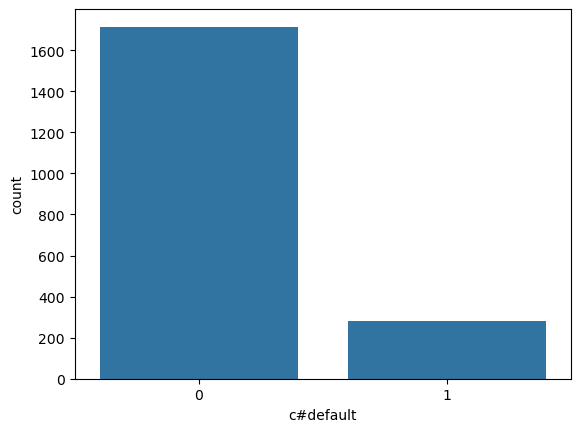

In [73]:
sns.countplot(x="c#default", data=dataset)

In [74]:
X = dataset.iloc[:, 1:4].values

X.shape

(1997, 3)

In [75]:
y = dataset.iloc[:, 4].values

y.shape

(1997,)

# Stratify split

In [76]:
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train.shape, y_train.shape

((1597, 3), (1597,))

In [77]:
X_test.shape, y_test.shape

((400, 3), (400,))

In [78]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [79]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [80]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [81]:
226 / len(y_train)

0.14151534126487164

In [82]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([343,  57]))

In [83]:
57 / len(y_test)

0.1425

# Naive Bayes Model

In [84]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [85]:
prediction = model.predict(X_test)

prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
accuracy_score(prediction, y_test)

0.9175

In [87]:
cm = confusion_matrix(prediction, y_test)

cm

array([[336,  26],
       [  7,  31]])

<Axes: >

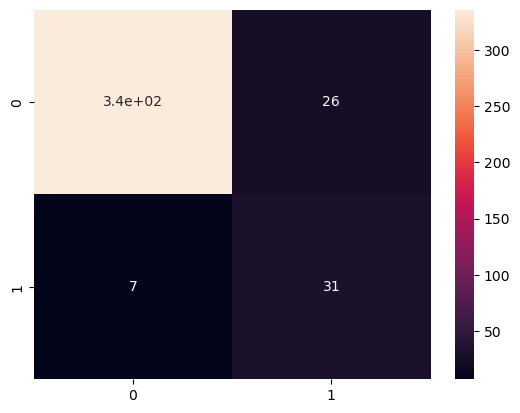

In [88]:
sns.heatmap(cm, annot=True)

In [89]:
print("Accuracy: ", (cm[0][0] + cm[1][1]) / cm.sum())
print("Precision: ", cm[1][1] / (cm[1][1] + cm[0][1]))
print("Recall: ", cm[1][1] / (cm[1][1] + cm[1][0]))
print("")
print("Payes: ", cm[0][0] / (cm[0][0] + cm[0][1]))
print("No payes: ", cm[1][1] / (cm[1][1] + cm[1][0]))

Accuracy:  0.9175
Precision:  0.543859649122807
Recall:  0.8157894736842105

Payes:  0.9281767955801105
No payes:  0.8157894736842105


# Imbalanced classes

## Undersampling

In [90]:
from imblearn.under_sampling import TomekLinks

In [91]:
tl = TomekLinks()

X_under, y_under = tl.fit_resample(X, y)

X_under.shape, y_under.shape

((1897, 3), (1897,))

In [92]:
np.unique(y, return_counts=True), np.unique(y_under, return_counts=True)

((array([0, 1]), array([1714,  283])), (array([0, 1]), array([1614,  283])))

In [93]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(
    X_under, y_under, test_size=0.2, stratify=y_under
)

X_train_u.shape, X_test_u.shape

((1517, 3), (380, 3))

In [94]:
model_u = GaussianNB()

model_u.fit(X_train_u, y_train_u)

prediction_u = model_u.predict(X_test_u)

accuracy_score(prediction_u, y_test_u)

0.9236842105263158

In [95]:
cm_u = confusion_matrix(prediction_u, y_test_u)

cm_u

array([[315,  21],
       [  8,  36]])

In [96]:
print("Accuracy: ", (cm_u[0][0] + cm_u[1][1]) / cm_u.sum())
print("Precision: ", cm_u[1][1] / (cm_u[1][1] + cm_u[0][1]))
print("Recall: ", cm_u[1][1] / (cm_u[1][1] + cm_u[1][0]))
print("")
print("Payes: ", cm_u[0][0] / (cm_u[0][0] + cm_u[0][1]))
print("No payes: ", cm_u[1][1] / (cm_u[1][1] + cm_u[1][0]))

Accuracy:  0.9236842105263158
Precision:  0.631578947368421
Recall:  0.8181818181818182

Payes:  0.9375
No payes:  0.8181818181818182


## Oversampling

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
smote = SMOTE(sampling_strategy="minority")

X_over, y_over = smote.fit_resample(X, y)

X_over.shape, y_over.shape

((3428, 3), (3428,))

In [99]:
np.unique(y, return_counts=True), np.unique(y_over, return_counts=True)

((array([0, 1]), array([1714,  283])), (array([0, 1]), array([1714, 1714])))

In [100]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(
    X_over, y_over, test_size=0.2, stratify=y_over
)

X_train_o.shape, X_test_o.shape

((2742, 3), (686, 3))

In [101]:
model_o = GaussianNB()

model_o.fit(X_train_o, y_train_o)

prediction_o = model_o.predict(X_test_o)

accuracy_score(prediction_o, y_test_o)

0.9125364431486881

In [102]:
cm_o = confusion_matrix(prediction_o, y_test_o)

cm_o

array([[307,  24],
       [ 36, 319]])

In [103]:
print("Accuracy: ", (cm_o[0][0] + cm_o[1][1]) / cm_o.sum())
print("Precision: ", cm_o[1][1] / (cm_o[1][1] + cm_o[0][1]))
print("Recall: ", cm_o[1][1] / (cm_o[1][1] + cm_o[1][0]))
print("")
print("Payes: ", cm_o[0][0] / (cm_o[0][0] + cm_o[0][1]))
print("No payes: ", cm_o[1][1] / (cm_o[1][1] + cm_o[1][0]))

Accuracy:  0.9125364431486881
Precision:  0.9300291545189504
Recall:  0.8985915492957747

Payes:  0.9274924471299094
No payes:  0.8985915492957747
